In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

C:\Users\scheng\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day) #exactly one year ago from todays date

In [4]:
for stock in tech_list:
    globals()[stock] =  DataReader(stock,'yahoo',start,end) #takes the string and makes it a global variable

In [5]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,104.943281,105.859130,104.161146,105.075296,3.742085e+07,104.124490
std,7.817291,7.790563,7.920262,7.880013,1.656403e+07,8.285970
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.320000,98.209999,96.629997,97.339996,2.681850e+07,96.123091
50%,106.000000,106.800003,105.209999,105.970001,3.293640e+07,104.963740
75%,111.129997,112.300003,110.330002,111.570000,4.316750e+07,111.059998
max,118.769997,119.930000,118.599998,119.750000,1.333697e+08,119.750000


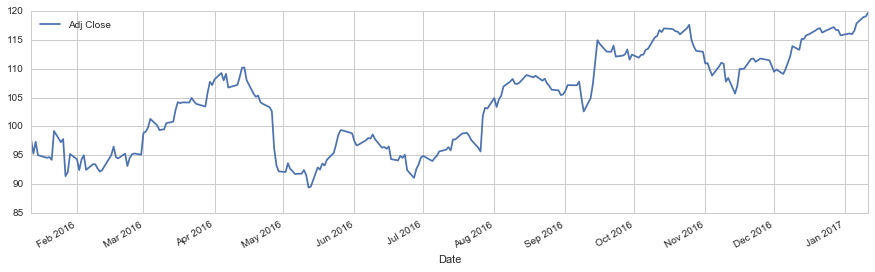

In [6]:
AAPL['Adj Close'].plot(legend = True, figsize=(15,4))


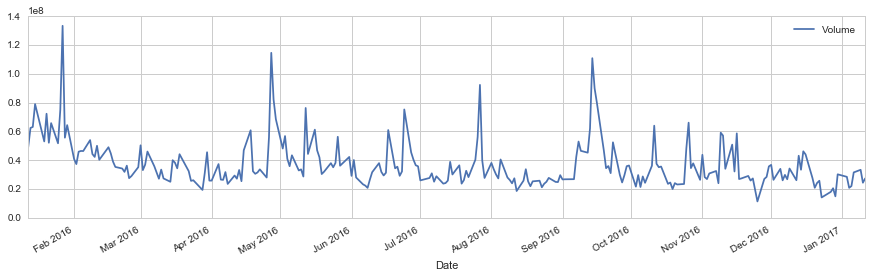

In [7]:
AAPL['Volume'].plot(legend = True, figsize=(15,4))

In [8]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA%s" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Users\scheng\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\scheng\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\scheng\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


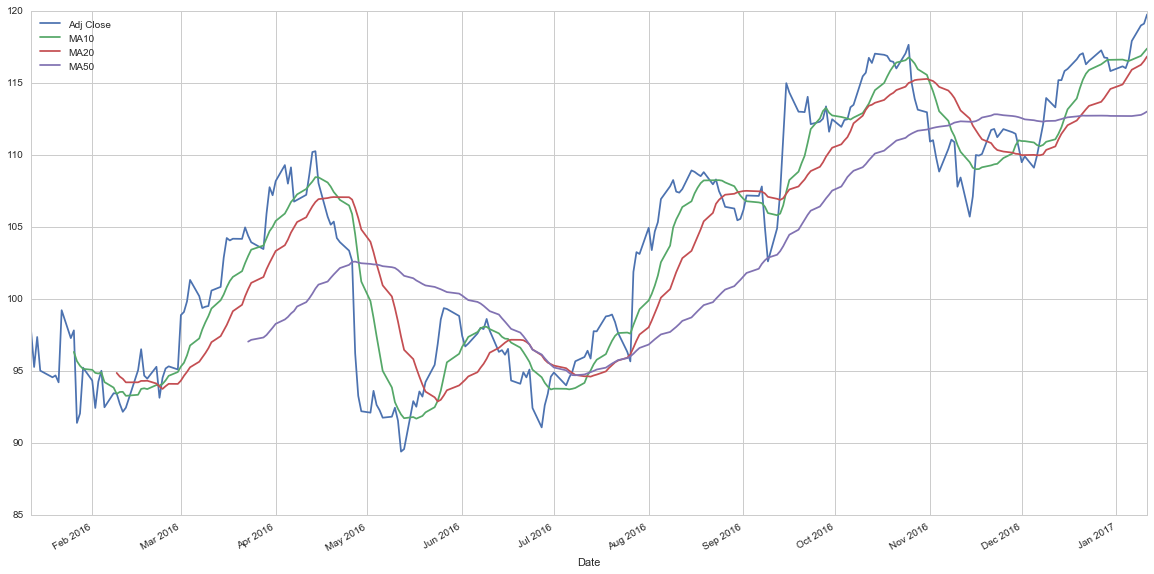

In [9]:
AAPL[['Adj Close','MA10','MA20','MA50']].plot(subplots = False, figsize = (20,10))

In [10]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

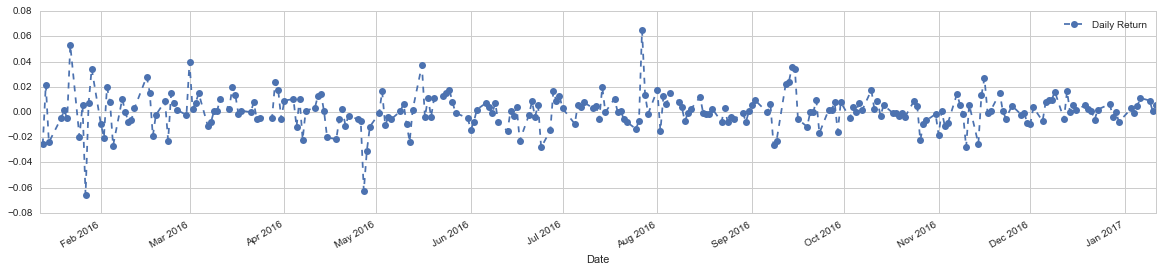

In [11]:
AAPL['Daily Return'].plot(legend = True, figsize = (20,4), linestyle = '--', marker = 'o')

C:\Users\scheng\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


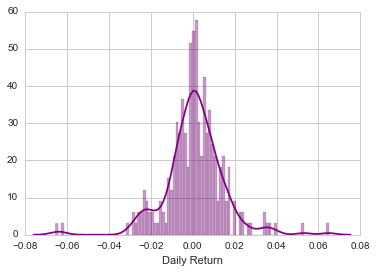

In [12]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

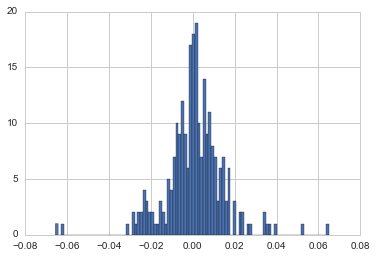

In [13]:
AAPL['Daily Return'].hist(bins=100)

In [14]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [15]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-12,97.784376,617.890015,726.070007,51.370385
2016-01-13,95.270312,581.809998,700.559998,50.260832
2016-01-14,97.353950,593.000000,714.719971,51.691573
2016-01-15,95.015969,570.179993,694.450012,49.628194
2016-01-19,94.556205,574.479980,701.789978,49.209678


In [16]:
tech_rets = closing_df.pct_change()

In [17]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-12,NaN,NaN,NaN,NaN
2016-01-13,-0.025710,-0.058392,-0.035134,-0.021599
2016-01-14,0.021871,0.019233,0.020212,0.028466
2016-01-15,-0.024015,-0.038482,-0.028361,-0.039917
2016-01-19,-0.004839,0.007541,0.010569,-0.008433


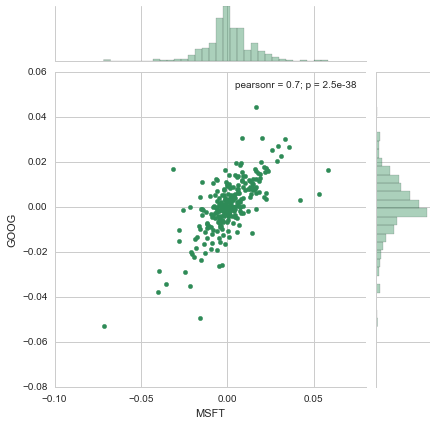

In [18]:
sns.jointplot('MSFT','GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

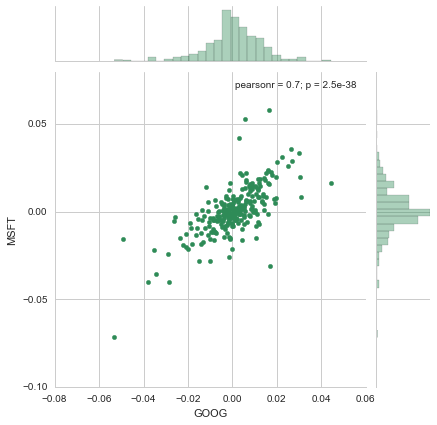

In [19]:
sns.jointplot('GOOG','MSFT', tech_rets, kind = 'scatter', color = 'seagreen')

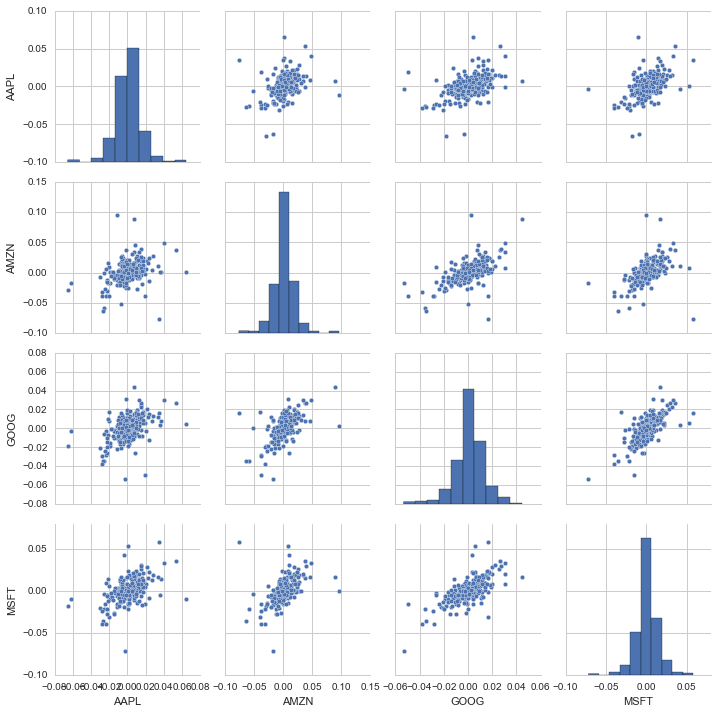

In [20]:
sns.pairplot(tech_rets.dropna())

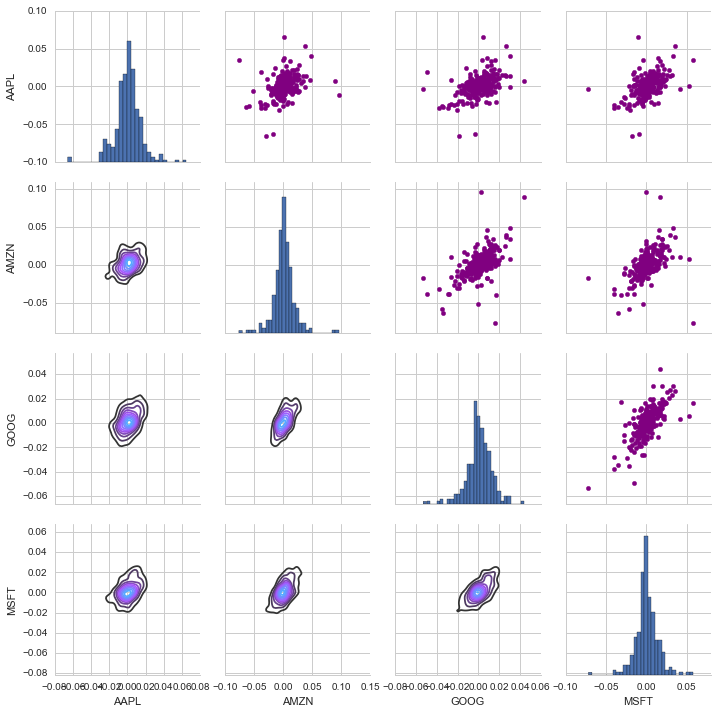

In [24]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)
